In [281]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import os
import json
import warnings
warnings.filterwarnings(action='ignore')
from string import punctuation
from nltk import word_tokenize
from nltk import WordNetLemmatizer
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import tkinter as tk
from tkinter import ttk
import warnings
import re
from nltk.corpus import stopwords
warnings.filterwarnings("ignore")
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('words', quiet=True) 
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier

In [27]:
#Getting more data 

from urllib import request
url = "https://www.ebay.com/sch/i.html?_from=R40&_trksid=p2334524.m570.l1313&_nkw=video+games&_sacat=0&LH_TitleDesc=0&_osacat=0&_odkw=gameboy"
html = request.urlopen(url).read().decode('utf8')
html[:60]

from bs4 import BeautifulSoup
soup = BeautifulSoup(html, 'html.parser')
title = soup.find('s-item__title')

print(title)

None


In [282]:
train = pd.read_csv("train.csv")

train.loc[6744]=0
train["id"][6744] = 6744
train["title"][6744] = "XBOX 360, very good quality, with games"
train["description"][6744] = "I am selling my XBOX 360, very good quality, with GTA 5 and Red dead Redemption 2"

#train.loc[6745]= 0
#train["id"][6745] = 6745
#train["title"][6745] = "Watch dogs"
#train["description"][6745] = "Watch dogs for PS4, very rarely used game"
#train["class"][6745] = 0

value = train["description"][2]
#Replacing Nan

for i in range(train.shape[0]):
    if type(train["description"][i]) == float:
        train["description"][i] = "No description"
        
for i in range(train.shape[0]):
    if type(train["title"][i]) == float:
        train["title"][i] = "No Title"
        
test = pd.read_csv("test.csv")

for i in range(test.shape[0]):
    if type(test["description"][i]) == float:
        test["description"][i] = "No description"
        
for i in range(test.shape[0]):
    if type(test["title"][i]) == float:
        test["title"][i] = "No title"

In [283]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text

In [30]:
train["cleaned"] = train["description"].apply(clean_text)
train["cleaned_title"] = train["title"].apply(clean_text)
test["cleaned"] = test["description"].apply(clean_text)
test["cleaned_title"] = test["title"].apply(clean_text)

In [31]:
from sklearn.model_selection import train_test_split

X = train["cleaned_title"] + train["cleaned"]
y = train["class"]
X_test = test["cleaned_title"] + test["cleaned"]

In [135]:
#Partie test
#Best lr = 0.000191
#lr 96% = 0.0001912
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf_svm', SGDClassifier(loss="hinge", alpha=0.000191, random_state=42, max_iter=5, penalty='l2'))])


nb.fit(X_train, y_train)

from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))

accuracy 0.9594861660079052


In [259]:
a = np.arange(0.000001, 0.00045, 0.00000001)

liste = [0]
for i in range(len(a)):
    nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf_svm', SGDClassifier(loss="hinge", alpha=a[i], random_state=42, max_iter=5, penalty='l2'))])


    nb.fit(X_train, y_train)
    
    if i%100==0:
        print(i)
        
    from sklearn.metrics import classification_report
    y_pred = nb.predict(X_test)
        
    if accuracy_score(y_pred, y_test)>max(liste):
        liste.append(accuracy_score(y_pred, y_test))
        print(len(liste),' accuracy %s' % accuracy_score(y_pred, y_test),  "learning_rate :", a[i])

0
2  accuracy 0.9352766798418972 learning_rate : 1e-06
3  accuracy 0.9372529644268774 learning_rate : 1.0099999999999999e-06
4  accuracy 0.9377470355731226 learning_rate : 1.0399999999999996e-06
5  accuracy 0.9402173913043478 learning_rate : 1.0799999999999992e-06
6  accuracy 0.9412055335968379 learning_rate : 1.2199999999999978e-06
7  accuracy 0.942193675889328 learning_rate : 1.4299999999999958e-06
8  accuracy 0.9431818181818182 learning_rate : 1.4799999999999954e-06
9  accuracy 0.9436758893280632 learning_rate : 1.519999999999995e-06
10  accuracy 0.9446640316205533 learning_rate : 1.5499999999999947e-06
11  accuracy 0.9466403162055336 learning_rate : 1.7099999999999932e-06
100
200
300
400
500
600
700
800
900
12  accuracy 0.9476284584980237 learning_rate : 1.0039999999999914e-05
13  accuracy 0.9486166007905138 learning_rate : 1.0049999999999914e-05
1000
14  accuracy 0.9491106719367589 learning_rate : 1.1209999999999903e-05
1100
15  accuracy 0.9496047430830039 learning_rate : 1.212999

KeyboardInterrupt: 

In [280]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

X = train["cleaned_title"] + train["cleaned"]
y = train["class"]
X_test = test["cleaned_title"] + test["cleaned"]

nb1 = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf_svm', SGDClassifier(loss="hinge", alpha=0.000191, random_state=42, max_iter=10, penalty='l2'))])


nb1.fit(X_train, y_train)

V="V_1"
y_pred=nb1.predict(X_test)
y_pred[1] = 1
y_pred[43] = 3
y_pred[1657] = 0
y_pred[632] = 3
y_pred[171] = 3
y_pred[775] = 1
y_pred[1029] = 1
y_pred[1276] = 0
y_pred[1625] = 0
y_pred[84] = 3
y_pred[774] = 0
y_pred[1625] = 0
y_pred[708] = 0
submission=pd.DataFrame({"class": y_pred})
submission["id"]=submission.index

submission.to_csv("submission_"+V+".csv", index=False)

In [67]:
y_pred[1]

1

In [68]:
train["class"].groupby(train["class"]).count()

class
0    1558
1    1362
2    2285
3    1540
Name: class, dtype: int64

ValueError: Found input variables with inconsistent numbers of samples: [1686, 2024]

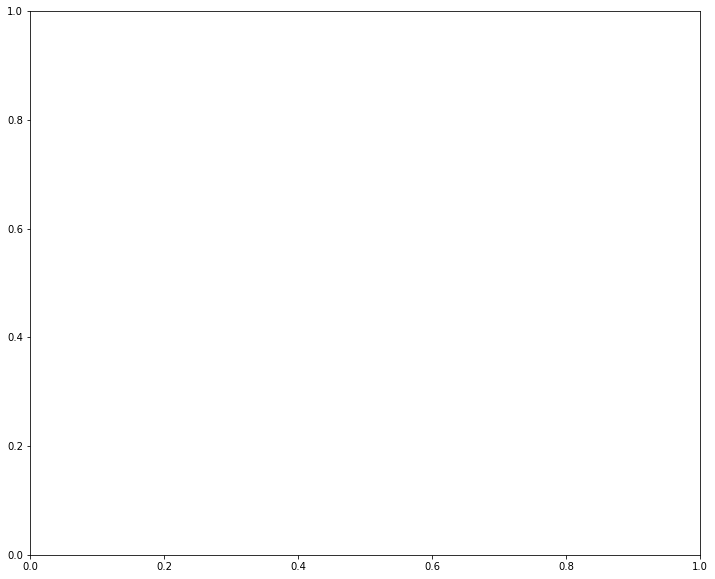

In [271]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import seaborn as sns

y_pred = nb.predict(X_test)

plt.subplots(figsize=(12,10))
sns.heatmap(confusion_matrix(y_pred, y_test), annot=True, fmt='g')
plt.ylabel('True label', fontsize=15)
plt.xlabel('Predicted label', fontsize=15)
plt.xticks(rotation=0);

In [70]:

train

,id,title,description,class,cleaned,cleaned_title
0,0,Samsung 32-inch Curved LED Monitor (Ultra- Sli...,1800R curved monitor with 3000:1 contrast rati...,3,1800r curved monitor 30001 contrast ratio prov...,samsung 32inch curved led monitor ultra slim d...
1,1,HotHands Body & Hand Super Warmers - Long Last...,"Bring the Heat!,HotHands Body & Hand Super War...",2,bring heat hothands body hand super warmers si...,hothands body hand super warmers long lasting ...
2,2,"WePet Cat Litter Mat, Kitty Litter Trapping Ma...",No description,1,description,wepet cat litter mat kitty litter trapping mat...
3,3,All-new Kindle Paperwhite Water-Safe Fabric Co...,No description,3,description,allnew kindle paperwhite watersafe fabric cove...
4,4,Street Fighter 30th Anniversary Collection - P...,Celebrate the 30th Anniversary of the iconic S...,0,celebrate 30th anniversary iconic street fight...,street fighter 30th anniversary collection pla...
...,...,...,...,...,...,...
6740,6740,GEARONIC Cycling Shockproof Foam Padded Sports...,No description,2,description,gearonic cycling shockproof foam padded sports...
6741,6741,OIVO Vertical Cooling Stand Compatible with Xb...,"Production specifications:, ,Input voltage: US...",0,production specifications input voltage usb 5v...,oivo vertical cooling stand compatible xbox on...
6742,6742,8Bitdo Gbros. Wireless Adapter for Nintendo Sw...,Connect any wired GameCube or classic Edition ...,0,connect wired gamecube classic edition control...,8bitdo gbros wireless adapter nintendo switch ...
6743,6743,"Vont 2 Pack LED Camping Lantern, Super Bright ...",No description,2,description,vont 2 pack led camping lantern super bright p...


In [71]:
test

,id,title,description,cleaned,cleaned_title,class
0,0,PDP 048-121-NA Afterglow Wired Controller for ...,Enhance your gaming experience with the Afterg...,enhance gaming experience afterglow wired cont...,pdp 048121na afterglow wired controller xbox o...,0
1,1,Gold Medal Groomers Ear Powder (30 Grams),"Great for relieving irritated itchy ears, Groo...",great relieving irritated itchy ears groomers ...,gold medal groomers ear powder 30 grams,1
2,2,Sports Research Sweet Sweat Premium Waist Trim...,No description,description,sports research sweet sweat premium waist trim...,2
3,3,Gildan Men's Fleece Open Bottom Pocketed Pant,Gildan is one of the world's largest verticall...,gildan one worlds largest vertically integrate...,gildan mens fleece open bottom pocketed pant,2
4,4,Sennheiser GAME ZERO Gaming Headset- Black,The new closed back G4ME ZERO headset is ideal...,new closed back g4me zero headset ideal immers...,sennheiser game zero gaming headset black,0
...,...,...,...,...,...,...
1681,1681,Mumu Sugar Professional Dog Whistles to Stop B...,No description,description,mumu sugar professional dog whistles stop bark...,1
1682,1682,Xbox Elite Wireless Controller,Get pro-level precision with the Xbox Elite Wi...,get prolevel precision xbox elite wireless con...,xbox elite wireless controller,0
1683,1683,CORSAIR Harpoon- RGB Gaming Mouse - Lightweigh...,"The Harpoon RGB mouse is built to perform, fea...",harpoon rgb mouse built perform featuring 6000...,corsair harpoon rgb gaming mouse lightweight d...,0
1684,1684,ONE PIECE: PIRATE WARRIORS 4 - Nintendo Switch,The Pirate Warriors are back and bring with th...,pirate warriors back bring explosive story env...,one piece pirate warriors 4 nintendo switch,0


In [166]:
sub = pd.read_csv("submission_V_1.csv")

In [73]:
test["class"] = sub["class"]

In [76]:
test[1350:1410]

,id,title,description,cleaned,cleaned_title,class
1350,1350,Hanes Sport Men's Mesh Pocket Short,Hanes Sport builds on our comfort heritage wit...,hanes sport builds comfort heritage innovative...,hanes sport mens mesh pocket short,2
1351,1351,HyperX Cloud Revolver S - Gaming Headset with ...,HyperX Cloud Revolver S features Plug N Play v...,hyperx cloud revolver features plug n play vir...,hyperx cloud revolver gaming headset dolby 71 ...,0
1352,1352,HP 201X | CF400X | Toner Cartridge | Black | H...,"HP 201X (CF400X)Toner Cartridge, Black High Yi...",hp 201x cf400x toner cartridge black high yiel...,hp 201x cf400x toner cartridge black high yield,3
1353,1353,BLU Studio View 2019-6.0” GSM Unlocked Smartph...,The BLU Studio view 2019 incorporates fashion ...,blu studio view 2019 incorporates fashion desi...,blu studio view 201960 gsm unlocked smartphone...,3
1354,1354,Tile Pro (2020) - 4 Pack,The updated Tile Pro is our most powerful and ...,updated tile pro powerful durable bluetooth tr...,tile pro 2020 4 pack,3
1355,1355,DualShock 4 Wireless Controller for Playstatio...,No where else will you find such a unique gami...,else find unique gaming experience ps4 color c...,dualshock 4 wireless controller playstation 4 ...,0
1356,1356,SanDisk 128GB MicroSDXC UHS-I Memory Card for ...,"Nintendo-licensed to provide dependable, high-...",nintendolicensed provide dependable highperfor...,sandisk 128gb microsdxc uhsi memory card ninte...,3
1357,1357,Glamorise Women's Full Figure No Bounce Plus S...,For fuller busted women seeking upper bust con...,fuller busted women seeking upper bust control...,glamorise womens full figure bounce plus size ...,2
1358,1358,303 30340CSR Marine UV Protectant Spray for Vi...,No other product provides this much protection...,product provides much protection boat water ge...,303 30340csr marine uv protectant spray vinyl ...,2
1359,1359,Prevue Pet Products 528 Universal Small Animal...,Prevue Pet Products Universal small animal hom...,prevue pet products universal small animal hom...,prevue pet products 528 universal small animal...,1


In [65]:
test[test["id"]==1029]

,id,title,description,cleaned,cleaned_title,class
1029,1029,Nite Ize Spotlit,FEATURES of the Nite Ize Spotlit Secure stainl...,features nite ize spotlit secure stainless ste...,nite ize spotlit,1


In [51]:
test[test["id"]==775]

,id,title,description,cleaned,cleaned_title,class
775,775,Pet-Ag Nursing Kit 2oz Bottle (Carded),This nursing bottle is designed and developed ...,nursing bottle designed developed veterinarian...,petag nursing kit 2oz bottle carded,2


In [95]:
test[test["id"]==1517]

,id,title,description,cleaned,cleaned_title,class
1517,1517,Cooler Master Hyper 212 Evo CPU Cooler w/ 4 Co...,"Cooler Master, an industry leading chassis, th...",cooler master industry leading chassis thermal...,cooler master hyper 212 evo cpu cooler w 4 con...,3


In [168]:
index = []
for i in range(len(y_pred)):
    if max(y_pred[i])<0.4:
        index.append(i)

TypeError: 'numpy.int64' object is not iterable

In [171]:
a = [(i, max(y_pred[i])) for i in range(len(y_pred))]

TypeError: 'numpy.int64' object is not iterable

In [170]:
a

[]

In [125]:
y_pred[index[0]]

3

In [161]:
test[test["id"]==1663]

,id,title,description,cleaned,cleaned_title,class
1663,1663,PowerColor Red Devil Radeon RX 5700 XT 8GB GDD...,PowerColor Red Devil Radeon RX 5700 XT 8GB GDDR6,powercolor red devil radeon rx 5700 xt 8gb gddr6,powercolor red devil radeon rx 5700 xt 8gb gdd...,3


In [172]:
y_pred

array([0, 1, 2, ..., 0, 0, 3])

In [263]:
X = train["cleaned_title"] + train["cleaned"]
y = train["class"]
X_test = test["cleaned_title"] + test["cleaned"]

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf_svm', SGDClassifier(loss="log", alpha=0.000191, random_state=42, max_iter=5, penalty='l2'))])


nb.fit(X, y)

V="V_1"
y_pred=nb.predict_proba(X_test)
y_pred[1] = 1
y_pred[43] = 3
y_pred[1657] = 0
y_pred[632] = 3
y_pred[171] = 3
y_pred[775] = 1
y_pred[1029] = 1
y_pred[1276] = 0
y_pred[1625] = 0
y_pred[84] = 3
y_pred[774] = 0
y_pred[1625] = 0

In [264]:
index = []
for i in range(len(y_pred)):
    if max(y_pred[i])>0.99:
        index.append(i)

In [269]:
test[test["id"]==index[3]]

,id,title,description,cleaned,cleaned_title,class
171,171,BTECH PC03 FTDI Genuine USB Programming Cable ...,Genuine FTDI Chipset - Works with the latest W...,genuine ftdi chipset works latest windows mac ...,btech pc03 ftdi genuine usb programming cable ...,3


In [265]:
len(index)

7